# Segmenting Coins from Scikit Image datasets

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, measure, morphology, feature

# Load the coins image
image = data.coins()

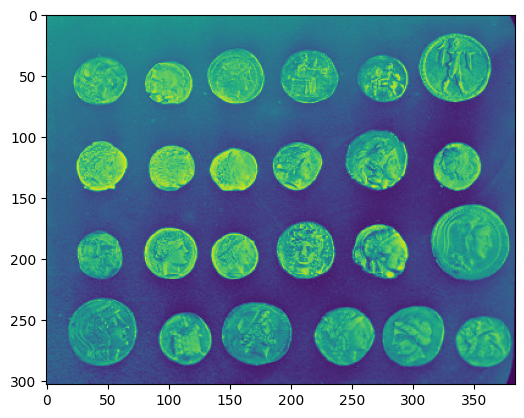

In [2]:
plt.imshow(image)

## Segmenting the image: Otsu

In this method we are simply doing Otus thresholding based on reflectance.

In [43]:
# we first automatically generate a threshold value to segment the imagery with
threshold_value = filters.threshold_otsu(image)
threshold_value

107

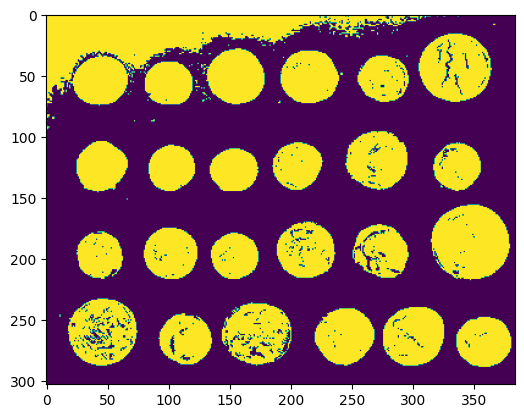

In [44]:
# then, we apply that threshold to segment the image assigning 0 and 1s
binary_image = image > threshold_value
plt.imshow(binary_image)

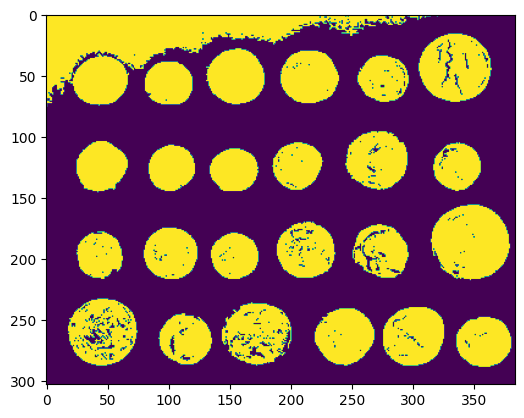

In [45]:
# note that there are some extra pixels in there, so I go ahead and clean them
# using the scikit image cleaning function
cleaned_image = morphology.remove_small_objects(binary_image, 21)
plt.imshow(cleaned_image)

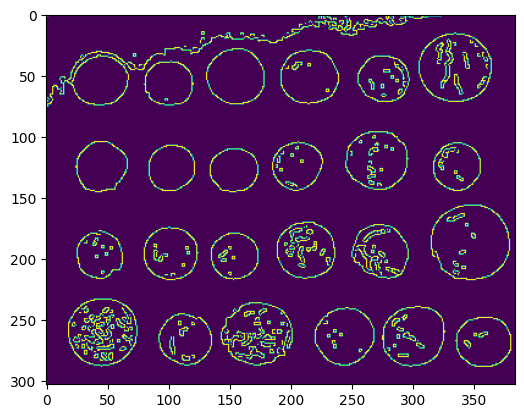

In [48]:
# coins still have some internal edge effects based on the faces
edges = feature.canny(cleaned_image)
plt.imshow(edges)

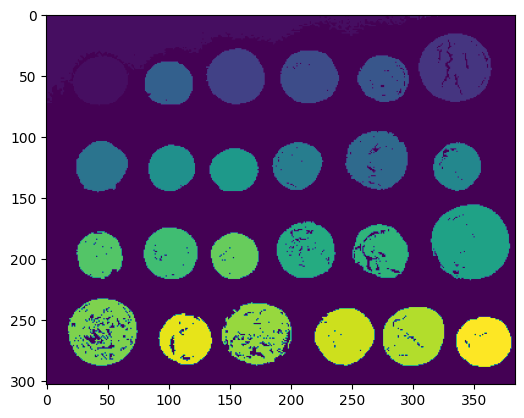

In [49]:
# after the data is clean, I can now label the image and count the number of coins
label_image, num_coins = measure.label(cleaned_image, return_num=True)
plt.imshow(label_image)

In [50]:
def plot_side_by_side(image, segmentation, num_coins):
  # set figure
  fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

  # plot the original image
  ax[0].imshow(image, cmap=plt.cm.gray)
  ax[0].set_title('Original Image, Number of coins: 24')

  # plot the cleaned image
  ax[1].imshow(cleaned_image, cmap=plt.cm.gray)
  ax[1].set_title(f'Number of coins detected: {num_coins}')

  # Draw a red boundary around each coin
  for region in measure.regionprops(label_image):
      # Draw a rectangle around the segmented coins
      minr, minc, maxr, maxc = region.bbox
      rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                          fill=False, edgecolor='red', linewidth=2)
      ax[1].add_patch(rect)

  plt.tight_layout()
  plt.show()

  return

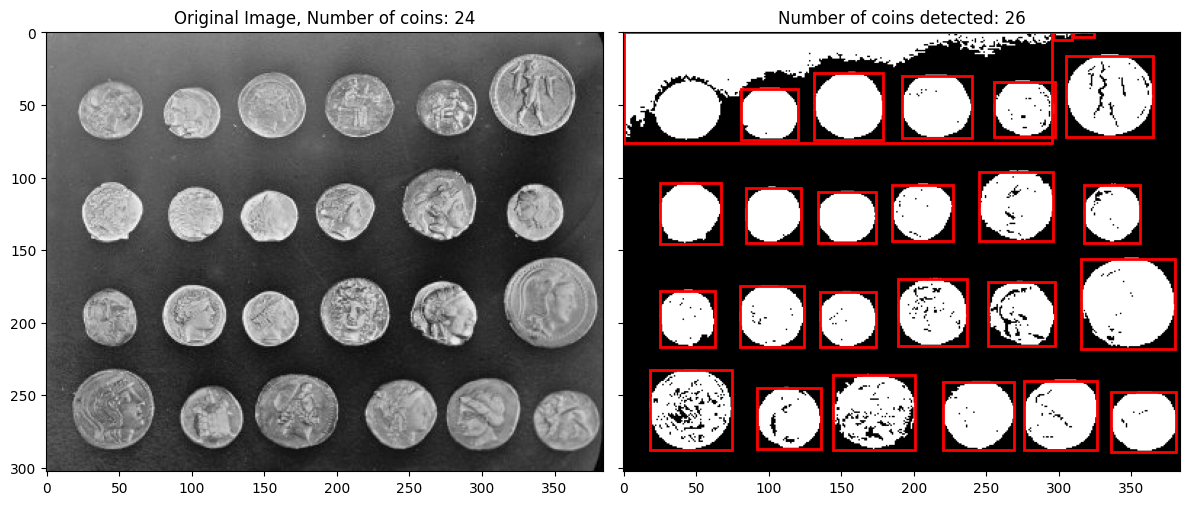

In [51]:
# we failed to segment the image
plot_side_by_side(image, label_image, num_coins)

## Segmenting the image: Otsu with Gaussian Transformation

In [52]:
# we first automatically generate a threshold value to segment the imagery with
blured_image = filters.gaussian(image, sigma=2)
threshold_value = filters.threshold_otsu(blured_image)
threshold_value

0.4029089752037105

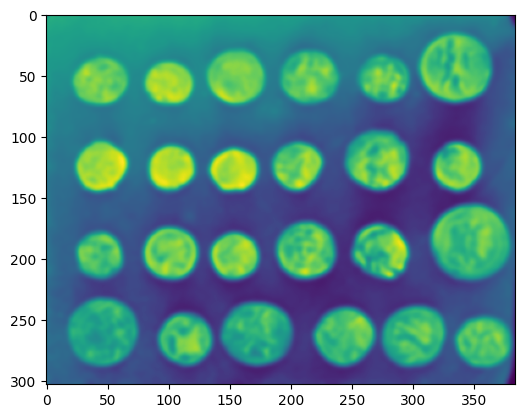

In [37]:
plt.imshow(blured_image)

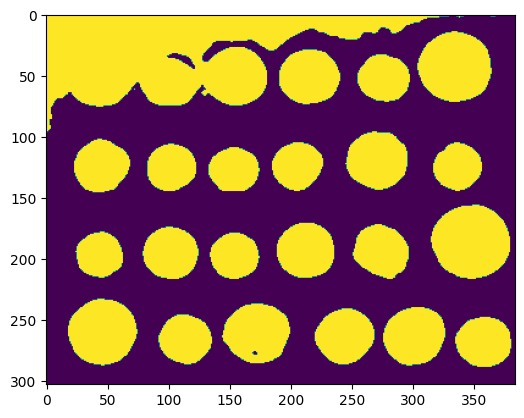

In [53]:
# then, we apply that threshold to segment the image assigning 0 and 0s
binary_image = blured_image > threshold_value
plt.imshow(binary_image)

I know for sure this did not work, so I will try another value for the gaussian bluring

In [54]:
# we first automatically generate a threshold value to segment the imagery with
blured_image = filters.gaussian(image, sigma=4)
threshold_value = filters.threshold_otsu(blured_image)
threshold_value

0.3943346060886572

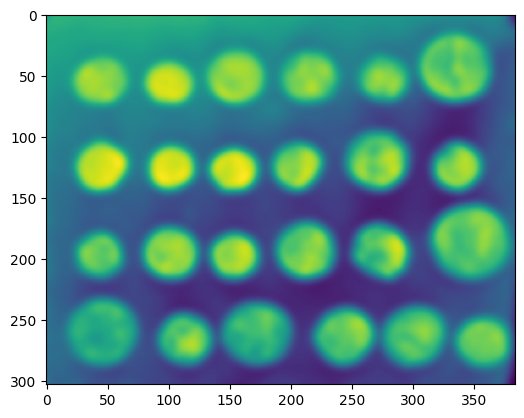

In [55]:
plt.imshow(blured_image)

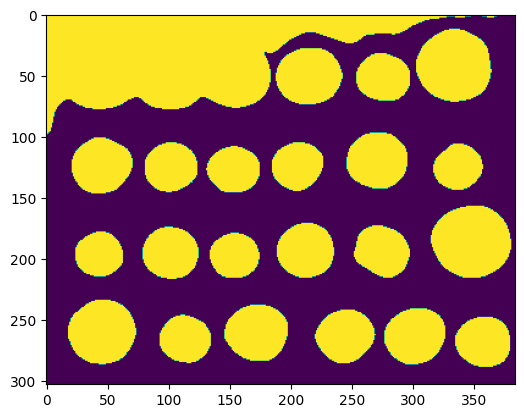

In [56]:
# then, we apply that threshold to segment the image assigning 0 and 0s
binary_image = blured_image > threshold_value
plt.imshow(binary_image)

Gaussian bluring makes it worst, maybe Otsu threshold is not the right answer. I remember yesterday we were working with edge detection when looking at the frog. Let's give that a try.

## Segmenting the image: Edge detection

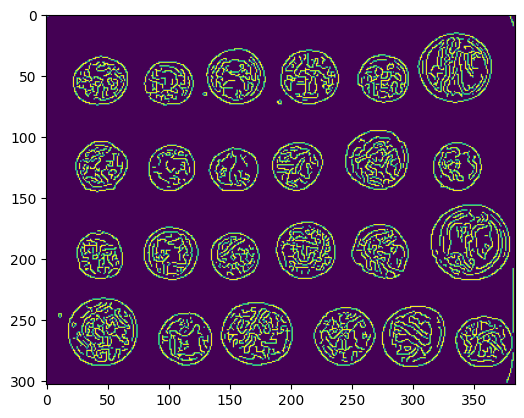

In [57]:
edges = feature.canny(image)
plt.imshow(edges)

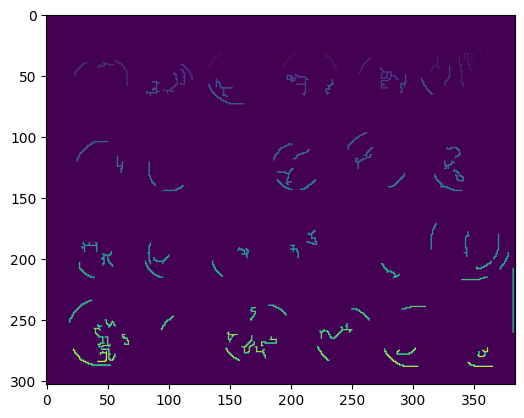

In [28]:
# this is definitely not going to work
cleaned_image = morphology.remove_small_objects(edges, 21)
label_image, num_coins = measure.label(cleaned_image, return_num=True)
plt.imshow(label_image)

## Segmenting the image: Edge detection with Gaussian Filter

What if I blur the image?

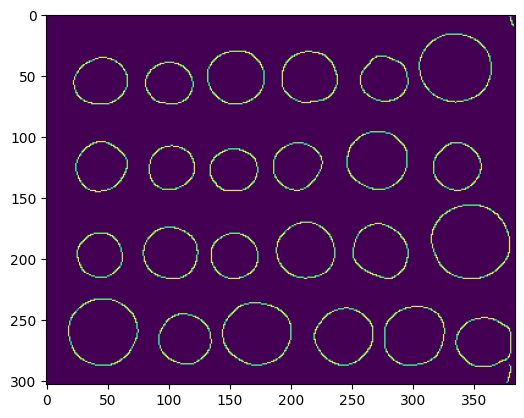

In [58]:
blured_image = filters.gaussian(image, sigma=4)
edges = feature.canny(blured_image)
plt.imshow(edges)

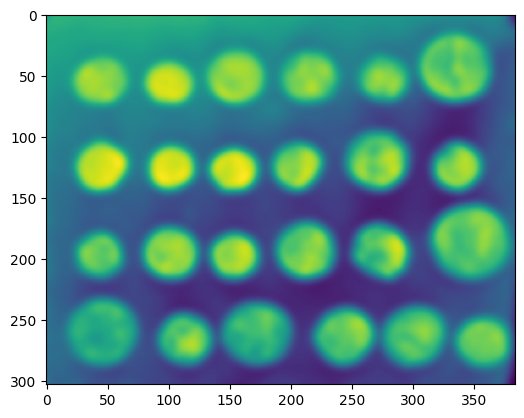

In [59]:
plt.imshow(blured_image)

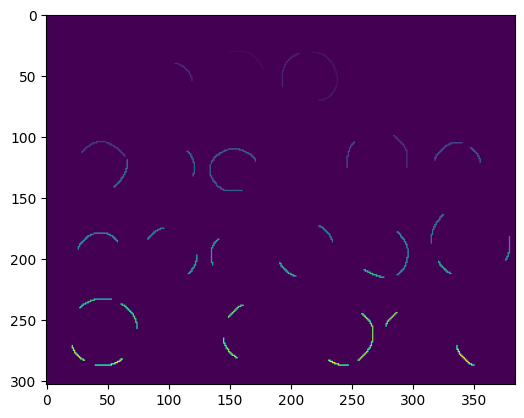

In [60]:
# this is definitely not going to work
cleaned_image = morphology.remove_small_objects(edges, 21)
label_image, num_coins = measure.label(cleaned_image, return_num=True)
plt.imshow(label_image)

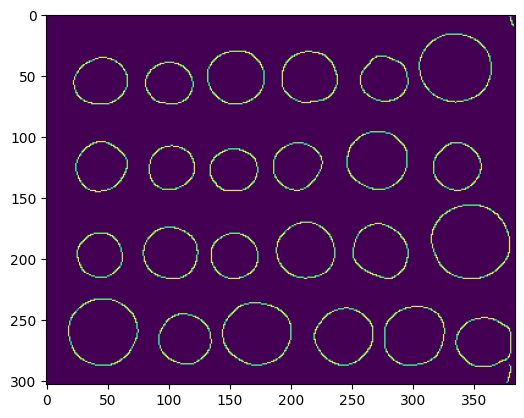

In [31]:
# wait, but I can fill the holes and be able to get those features
# Google: how to fill holes in an image segmentation
from scipy import ndimage

blured_image = filters.gaussian(image, sigma=4)
edges = feature.canny(blured_image)
plt.imshow(edges)

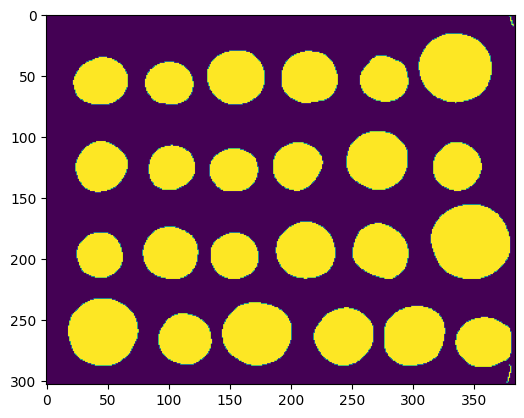

In [33]:
fill_coins = ndimage.binary_fill_holes(edges)
plt.imshow(fill_coins)

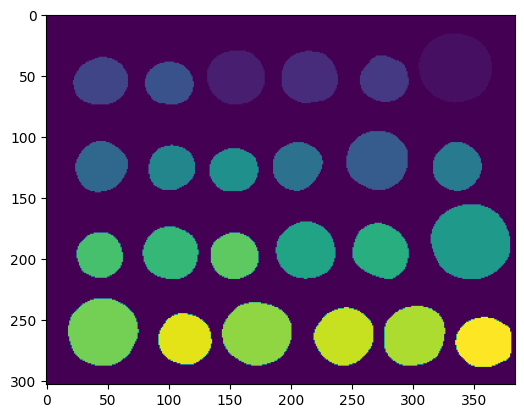

In [34]:
# this is definitely not going to work
cleaned_image = morphology.remove_small_objects(fill_coins, 21)
label_image, num_coins = measure.label(cleaned_image, return_num=True)
plt.imshow(label_image)

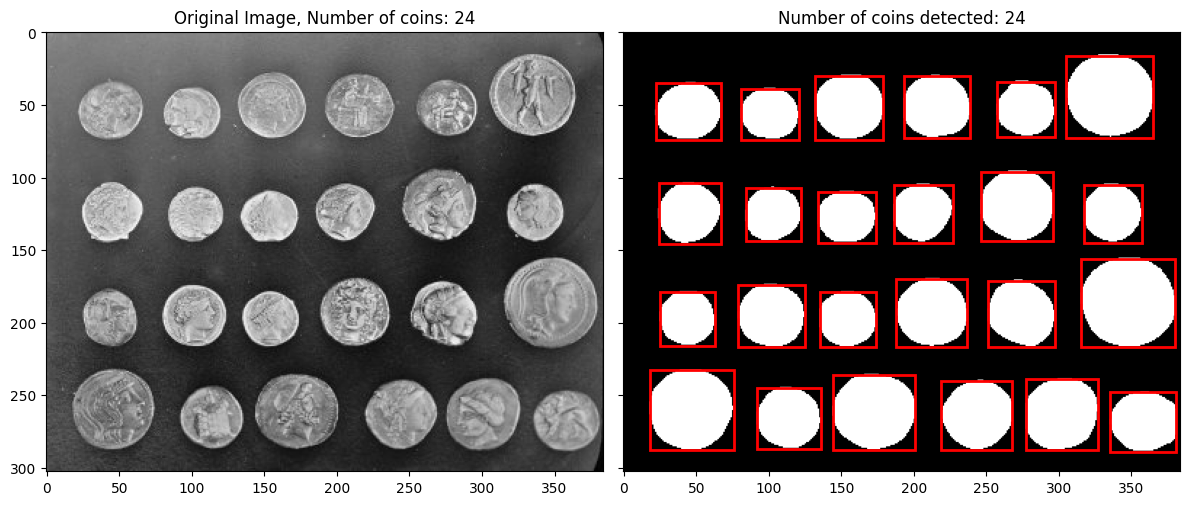

In [35]:
plot_side_by_side(image, label_image, num_coins)

In [61]:
from skimage.segmentation import inverse_gaussian_gradient

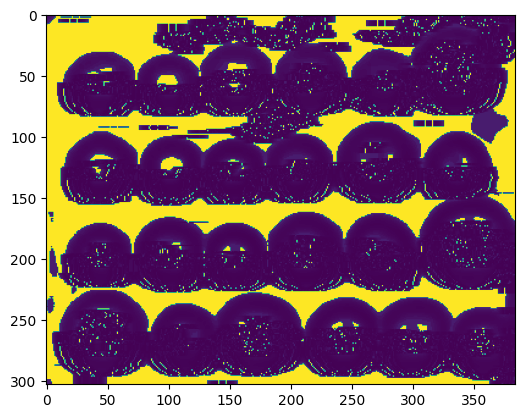

In [62]:
inverse_gaussian_image = inverse_gaussian_gradient(image)
plt.imshow(inverse_gaussian_image)

In [63]:
from skimage.segmentation import watershed

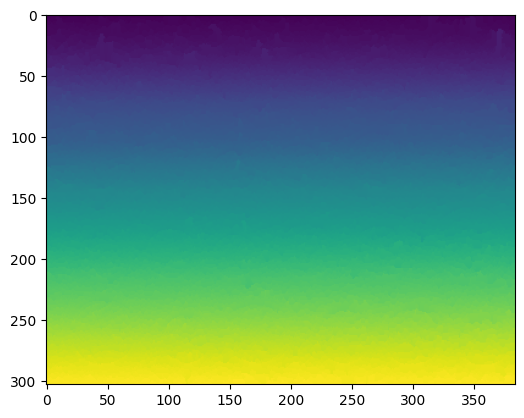

In [64]:
watershed_image = watershed(image)
plt.imshow(watershed_image)